In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

er=[]
m1=[]
c1=[]
te=[]
def compute_error(c, m, x,y):
    totalError = 0
    x = x
    y = y
    #print(c,m)
    m1.append(m)
    c1.append(c)
    for i in range(0,len(x)):
        totalError+=(((m * x[i] + c)-y[i]) ** 2)
      #te.append(totalError)
    #print(te)
    #err=(np.array(te).sum())
    er.append(totalError/len(x))
    #print(er)

def step_gradient(c_current, m_current, x,y, learningRate):
    c_gradient = 0.0
    m_gradient = 0.0
    N = float(len(x))
    x = x
    y = y
    cg=[]
    mg=[]
    for i in range(0,len(x)):
        cg.append(((m_current * x[i]) + c_current)-y[i])
        mg.append(x[i] * (((m_current * x) + c_current)-y[i]))
    c_gradient=(np.array(cg).sum())/N
    m_gradient=(np.array(mg).sum())/N
    new_c = c_current - (learningRate * c_gradient)
    new_m = m_current - (learningRate * m_gradient)
    compute_error(new_c,new_m,x,y)
    return [new_c, new_m]

def gradient_descent_runner(x,y, starting_c, starting_m, learning_rate, num_iterations):
    c = starting_c
    m = starting_m
    for i in range(num_iterations):
        c,m=step_gradient(c, m, x,y, learning_rate)
      #print(c,m)
   
def run():
    data = pd.read_csv('Salary_Data.csv')
    z=[]
    for x in data.columns:
        z.append(x)
    data=data[z].apply(lambda rec:(rec - rec.mean())/rec.std(), axis=0)
    sn = data
    x1=sn.iloc[:,0:1]
    y1=sn.iloc[:,1:2]
    x=np.array(x1)
    y=np.array(y1)
    learning_rate = 0.001
    initial_c = 1 # initial y-intercept guess
    initial_m = 1 # initial slope guess
    num_iterations = 100
    compute_error(initial_c, initial_m,x,y)
    gradient_descent_runner(x,y, initial_c, initial_m, learning_rate, num_iterations)
    


run()
it=np.arange(0,101)
#print(er)
#plt.plot(it,er)

[array([1.0420662]), array([1.04203855]), array([1.04357085]), array([1.04666308]), array([1.05131524]), array([1.05752731]), array([1.0652993]), array([1.0746312]), array([1.08552299]), array([1.09797466]), array([1.11198622]), array([1.12755765]), array([1.14468895]), array([1.1633801]), array([1.1836311]), array([1.20544194]), array([1.22881261]), array([1.25374311]), array([1.28023343]), array([1.30828356]), array([1.33789349]), array([1.36906322]), array([1.40179273]), array([1.43608202]), array([1.47193108]), array([1.50933991]), array([1.5483085]), array([1.58883683]), array([1.6309249]), array([1.67457271]), array([1.71978024]), array([1.76654749]), array([1.81487446]), array([1.86476112]), array([1.91620748]), array([1.96921353]), array([2.02377927]), array([2.07990467]), array([2.13758974]), array([2.19683447]), array([2.25763885]), array([2.32000287]), array([2.38392654]), array([2.44940982]), array([2.51645274]), array([2.58505526]), array([2.65521739]), array([2.72693913])

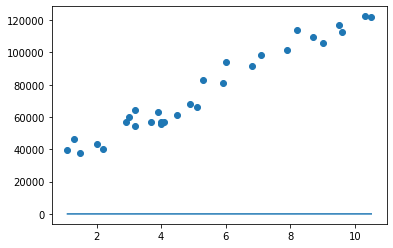

In [7]:
sn = pd.read_csv('Salary_Data.csv')
x1=sn.iloc[:,0:1]
y1=sn.iloc[:,1:2]
x=np.array(x1)
plt.scatter(x1,y1)
m=max(np.array(m1))
c=min(np.array(c1))
e=np.array(er)
print(er)
e1=min(e)
print(er.index(e1))
print(m1[er.index(e1)],c1[er.index(e1)])
p=[]
for i in range(0,len(x1)):
    p.append(m1[er.index(e1)]*x[i]+c1[er.index(e1)])
plt.plot(x1,p)
a=float(input('enter experience : '))
print(f'salary = {m1[er.index(e1)]*a+c1[er.index(e1)]}')
b=float(input('enter experience : '))
print(f'salary = {m1[er.index(e1)]*b+c1[er.index(e1)]}')

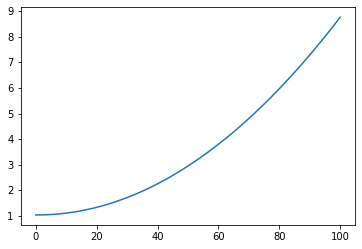

In [3]:
a=np.arange(0,101)
plt.plot(a,er)